## NLP with Diseaser Tweets

Natural disasters are serious events that affect human life and the environment, and it is important to understand how these events are reflected on social media. This study aims to automatically classify tweets about disasters. The aim is to develop a natural language processing (NLP) model that predicts which tweets describe real natural disasters and which are irrelevant. In this process, data analysis and model development steps were performed using various methods and techniques.

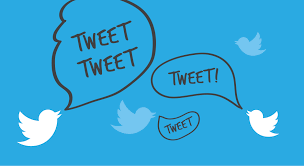

<a href='https://www.kaggle.com/competitions/nlp-getting-started/' target=_blank>You can find the competition here</a>

In [92]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cloudd/cloud.png
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## Import Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')

In [94]:
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
#Reading the file.

## EDA 

In [95]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [96]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [97]:
train=train.dropna()

In [98]:
train.shape

(5080, 5)

In [99]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [100]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [101]:
test=test.dropna()

In [102]:
test.shape

(2158, 4)

In [103]:
df=pd.concat([train,test])
#Merging the files.

In [104]:
df.shape

(7238, 5)

In [105]:
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1.0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0.0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1.0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0.0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7238 entries, 31 to 3250
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7238 non-null   int64  
 1   keyword   7238 non-null   object 
 2   location  7238 non-null   object 
 3   text      7238 non-null   object 
 4   target    5080 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 339.3+ KB


In [107]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace("[^\w\s]" , "",regex=True)
df['text']=df['text'].str.replace('[\n]', '',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\r',' ')

In [108]:
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["text"] = df["text"].apply(remove_accent)

In [109]:
import html

df = html.unescape(df)

In [110]:
pattern = r"\&\#[0-9]+\;"
df["text"] = df["text"].str.replace(pat=pattern, repl="", regex=True)

In [111]:
pattern = r"\&\#[0-9]+\;"
df["keyword"] = df["keyword"].str.replace(pat=pattern, repl="", regex=True)

In [112]:
df['keyword'].value_counts()

keyword
buildings%20on%20fire    45
inundated                44
sandstorm                43
derailed                 43
snowstorm                43
                         ..
threat                   13
detonation               12
radiation%20emergency    11
epicentre                 9
inundation                6
Name: count, Length: 221, dtype: int64

In [113]:
df['keyword']=df['keyword'].str.lower()
df['keyword']=df['keyword'].str.replace("[^\w\s]" , "",regex=True)
df['keyword']=df['keyword'].str.replace('[\n]', '',regex=True)
df['keyword']=df['keyword'].str.replace('\d+','',regex=True)
df['keyword']=df['keyword'].str.replace('\r',' ')

In [114]:
df['location']=df['location'].str.lower()
df['location']=df['location'].str.replace("[^\w\s]" , "",regex=True)
df['location']=df['location'].str.replace('[\n]', '',regex=True)
df['location']=df['location'].str.replace('\d+','',regex=True)
df['location']=df['location'].str.replace('\r',' ')

In [115]:
df['target'].value_counts()

target
0.0    2884
1.0    2196
Name: count, dtype: int64

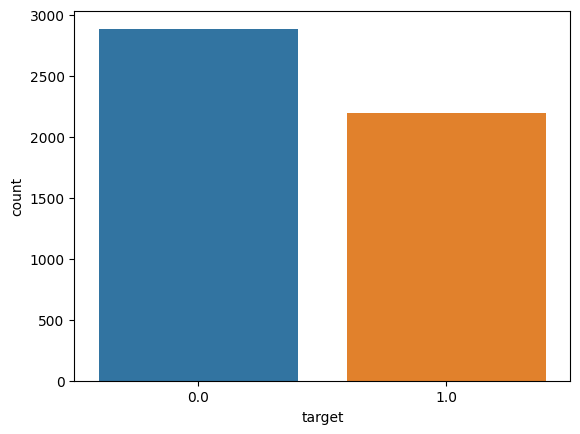

In [116]:
sns.countplot(x=df['target']);

## WordCloud

In [117]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('/kaggle/input/cloudd/cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

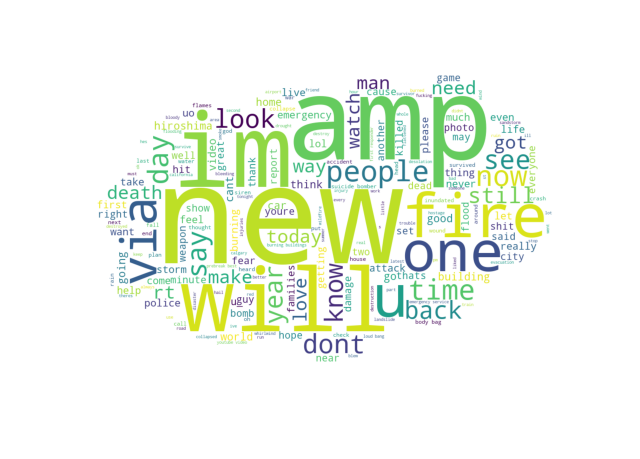

In [119]:
wc(df['text'],'white')

## Polarity-Subjectivity 

In [120]:
from textblob import TextBlob

In [121]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

## Vectorization and Lemma-Stemma

In [122]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import PorterStemmer

In [123]:
pr=PorterStemmer()

In [124]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [125]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

## Modelling

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [127]:
train.shape

(5080, 5)

In [128]:
train=df[:5080]
test=df[5080:]

In [129]:
train.drop('id', axis=1, inplace=True)

In [130]:
train.head()

,keyword,location,text,target,polarity,subjectivity
31,ablaze,birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohyc,1.0,0.00,0.000000
32,ablaze,est september bristol,we always try to bring the heavy metal rt http...,0.0,-0.20,0.500000
33,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1.0,0.00,0.000000
34,ablaze,philadelphia pa,crying out for more set me ablaze,0.0,0.15,0.550000
35,ablaze,london uk,on plus side look at the sky last night it was...,0.0,0.00,0.066667


In [131]:
x=train[['text']]
y=train[['target']]

In [132]:
x=vect.fit_transform(x['text'])

In [133]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [134]:
l=LogisticRegression()
model=l.fit(x_train,y_train)
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.7746062992125984

In [135]:
print(classification_report(lpred, y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       607
         1.0       0.71      0.75      0.73       409

    accuracy                           0.77      1016
   macro avg       0.77      0.77      0.77      1016
weighted avg       0.78      0.77      0.78      1016



In [136]:
confusion_matrix(lpred, y_test)

array([[479, 128],
       [101, 308]])

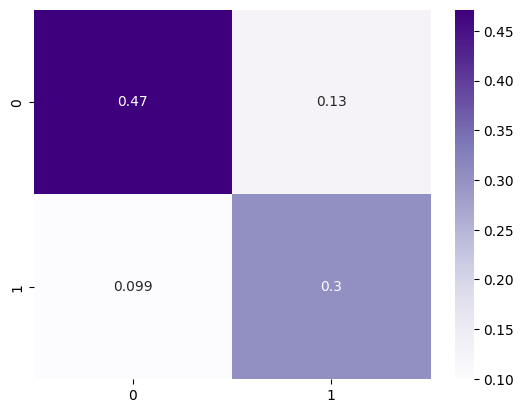

In [137]:
cm = confusion_matrix(lpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples');

In [138]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):
    
    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression','BernoulliNB', 'MultinomialNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
        
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1
    
    
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [139]:
algo_test(x, y)

,Accuracy,Precision,Recall,F1-score
BernoulliNB,0.799213,0.800084,0.799213,0.796732
MultinomialNB,0.793307,0.792554,0.793307,0.792314
SVM,0.790354,0.798363,0.790354,0.784383
Logistic Regression,0.774606,0.773648,0.774606,0.773569
Random Forest,0.764764,0.772588,0.764764,0.757119
Gradient Boosting,0.748031,0.757412,0.748031,0.738203
AdaBoost,0.745079,0.755306,0.745079,0.734547
MLP Classifier,0.741142,0.742657,0.741142,0.741692
Decision Tree,0.730315,0.731361,0.730315,0.730736
K-Nearest Neighbors,0.655512,0.705063,0.655512,0.602728


In [140]:
test.head()

,id,keyword,location,text,target,polarity,subjectivity
15,46,ablaze,london,birmingham wholesale market is ablaze bbc news...,NaN,0.0,0.0
16,47,ablaze,nialls place saf squad,sunkxssedharry will you wear shorts for race a...,NaN,0.0,0.0
17,51,ablaze,nigeria,previouslyondoyintv toke makinwauas marriage c...,NaN,0.0,0.0
18,58,ablaze,live on webcam,check these out httptcoroinsmejj httptcotjzjin...,NaN,0.0,0.0
19,60,ablaze,los angeles califnordia,psa iuam splitting my personalities techies fo...,NaN,0.0,0.0


In [141]:
test1=test.drop('target',axis=1)

In [145]:
test1.drop(['keyword','location'], axis=1, inplace=True)

In [148]:
test1.head()

,id,text,polarity,subjectivity
15,46,birmingham wholesale market is ablaze bbc news...,0.0,0.0
16,47,sunkxssedharry will you wear shorts for race a...,0.0,0.0
17,51,previouslyondoyintv toke makinwauas marriage c...,0.0,0.0
18,58,check these out httptcoroinsmejj httptcotjzjin...,0.0,0.0
19,60,psa iuam splitting my personalities techies fo...,0.0,0.0


In [149]:
test1=vect.transform(test['text'])

In [150]:
b=BernoulliNB()
b.fit(x,y)
pred=b.predict(test1)

In [151]:
pred1=pd.DataFrame()
pred1['id']=test['id']
pred1['Target']=pred

In [152]:
pred1.head()

,id,Target
15,46,1.0
16,47,0.0
17,51,1.0
18,58,0.0
19,60,0.0


In [153]:
pred1.to_csv('submission_diseaser.csv', index=False)

## Summary

* Data Reading and Merging:Tweet data about natural disasters was loaded and training and test sets were merged. This allowed for holistic analysis of the data.

* Data Preprocessing:Unnecessary characters such as punctuation marks, accents, and HTML marks were cleaned. This process simplified the texts and made them suitable for analysis.

* Word Cloud Creation:A word cloud was created to visualize the content of the tweets. This was useful in showing the most frequently used words and themes.

* Polarity and Subjectivity Analysis:The sentiment (polarity) and subjectivity analyses of the tweets were performed. These analyses were used to understand the general attitude of the texts.

* Vectorization:Text data was converted to numerical data. This process is necessary for machine learning algorithms to process the texts. Words were reduced to their roots using lemmatization and stemming methods.

* Data Separation:Features (x) and target variable (y) were defined. At this stage, the data was prepared for training the model.

* Model Training:The model was trained with the selected machine learning algorithm. The model optimized the parameters to classify tweets about natural disasters.

* Model Evaluation:Various metrics were used to evaluate the performance of the model.Confusion Matrix: Used to visualize the prediction performance of the model.Classification Report: Metrics such as accuracy, recall and F1 score were calculated.

* Predicting Test Data:
The trained model made predictions on the test dataset. These predictions were used to evaluate the performance of the model on real-world data.

* Saving Results:
The prediction results were saved in a CSV file format. This file was prepared so that the results could be analyzed or shared later.

**Conclusion:**
This study covers the development of a natural language processing model for automatic classification of tweets about natural disasters. The analyses and model evaluations emphasize the importance of social media data in understanding and managing disaster situations. Such systems can play a critical role in the early detection and response processes of disasters, thereby contributing to better preparedness of societies.